<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Fernanda Urrea, ROL: 201551522-0 </H3>
<H3 align='center'> Matías Gómez, ROL: 201460501-3 </H3>

<hr style="height:2px;border:none"/>

## 1. Tipos de fronteras en clasificación

Como se ha discutido en clases, los problemas de clasificación pueden ser representados de distintas maneras, en donde estas representaciones definen un espacio de entrada del dominio de los datos ($\mathbb{R}_{\mathbb{X}}$). Los ejemplos dentro del espacio de entrada (*manifold*) pueden tener distintas formas, donde estas indicarán si es que estos ejemplos tendrán fronteras lineales o no. Con el propósito de analizar los distintos tipos de fronteras que definen los algoritmos de clasificación, se trabajará con un dataset sintético lo cual es ideal para analizar los diferentes tipos, así hacer un recorrido rápido por las grandes ideas en la búsqueda dela no-linealidad.

Este dataset de juguete está en un espacio de 2 dimensiones y es conformado por dos conjuntos de datos, pudiendo ver que la frontera entre ellos claramente no es lineal. El dataset representa al problema XOR, pero para trabajarlo de una manera distinta se generán gausianas para agregar un poco de ruido en el conjunto de entrenamiento y que no sea un problema trivial. El código que los genera es el siguiente:

In [1]:
import numpy as np

def do_gaussianXOR(n1=250,n2=250):
    rng = np.random.RandomState(0)
    u = 0.5
    std = 0.3 #el ruido se agrega aca
    primer_c = rng.normal(loc=[u,u],scale=std,size=(n1,2))
    segundo_c = rng.normal(loc=[-u,u],scale=std,size=(n2,2))
    tercer_c = rng.normal(loc=[-u,-u],scale=std,size=(n1,2))
    cuarto_c = rng.normal(loc=[u,-u],scale=std,size=(n2,2))
    X_train = np.vstack((primer_c,segundo_c,tercer_c,cuarto_c))
    Y_train = np.hstack((np.zeros(n1),np.ones(n2),np.zeros(n1),np.ones(n2)))   
    X_test = rng.uniform(low=-1.0,high=1.0,size=( (n1+n2),2))
    Y_test = np.logical_xor(X_test[:,0] > 0, X_test[:,1] > 0)
    return X_train,Y_train,X_test,Y_test

#### a) Construya el conjunto de datos (*dataset*) y describa el proceso de creación de éstos. Determine cuántos registros contiene cada conjunto y visualı́celos.

In [2]:
X_train,Y_train,X_test,Y_test = do_gaussianXOR()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


cant0=0;
cant1=0;
for i in range(1000):
    if Y_train[i]==0:
        cant0 += 1;
    else:
        cant1 +=1;
print(cant0,cant1);

(1000, 2)
(1000,)
(500, 2)
(500,)
500 500


El conjunto X_train tiene 1000 registros con 2 elementos cada uno.  
El conjunto Y_train tiene 1000 registros correspondientes a los outputs de X_train.  
El conjunto X_test tiene 500 resgistros con 2 elementos cada uno.   
El conjunto Y_test tiene 500 registros correspondientes a los outputs de X_test.   
Para la creación del dataset, se utiliza la función do_gaussianXOR() creada anteriormente, la cual, genera inputs aleatoriamente dentro de los rangos dados con algo de ruido como se aprecia en la parte siguiente.   

In [3]:
import matplotlib.pyplot as plt

def visualize_data(x,y,title=""):
    fig, axis = plt.subplots(1, 1,figsize=(12, 6))

    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

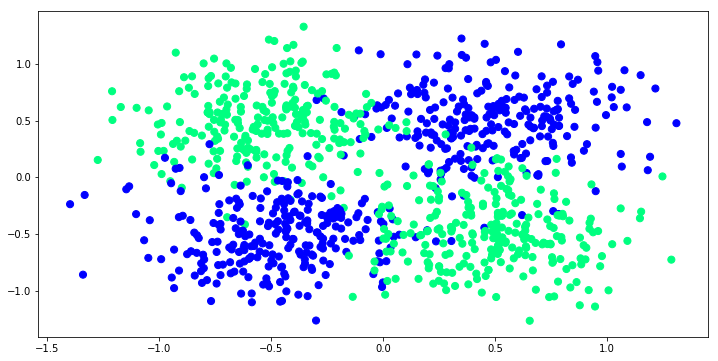

In [4]:
visualize_data(X_train,Y_train,title='Visualización de los datos')

#### b) Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que define este algoritmo. Comente cualitativamente lo que observa.

Para visualizar las fronteras de los distintos algoritmos utilice el siguiente código:

In [5]:
import matplotlib.pyplot as plt

def visualize_border(model,x,y,title=""):
    fig, axis = plt.subplots(1, 1,figsize=(12, 6))

    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #or predict_proba
    Z = Z.reshape(xx.shape)
    Zplot = Z > 0.5
    
    axis.scatter(x[:,0],x[:,1],s=50,c=y,zorder=10,cmap=plt.cm.winter)
    #axis.contour(xx, yy, Z,levels=[-1, 0, 1])
    axis.contour(xx, yy, Z,levels=[1, 2, 3])
    axis.pcolormesh(xx, yy, Zplot ,cmap=plt.cm.YlGn)
    plt.title(title)
    plt.show()

C:\Users\Matu\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


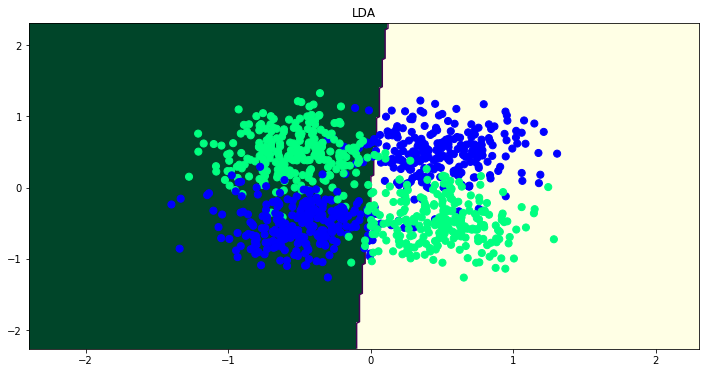

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(X_train,Y_train)
visualize_border(model,X_train,Y_train,"LDA")

De la graifica anterior, se observa que el modelo LDA no da una buena solución al problema ya que genera solo una frontera lineal que no logra seperar bien los conjuntos, pues siempre deja una gran cantidad de puntos verdes con azules y viceversa (a priori la mitad)  }


#### c) Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y en qué se asemejan ¿Qué  distribución de probabilidad asumen cada uno?

C:\Users\Matu\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


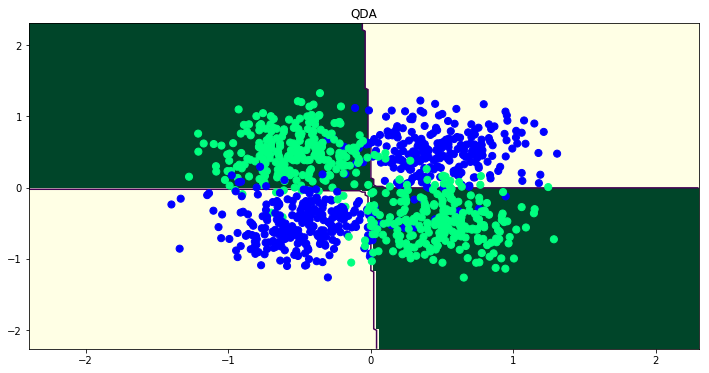

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA()
model.fit(X_train,Y_train)
visualize_border(model,X_train,Y_train,"QDA")

A diferencia de LDA, se observa que QDA si da una solución razonable al problema, puesto que separa, con poco error apreciable, ambos conjuntos.  
Esto se debe a que un único hiperplano no puede separar ambos conjuntos.  

LDA asume que los datos estan distribuidos de forma normal (De hecho se recomienda normalizar los datos antes de usar LDA)  
QDA también asume que los datos están distribuidos de forma normal.  


LDA asume que cada variable tiene la misma varianza.  
QDA cada clase usa su propia estimación de la varianza, o covarianza cuando existen multiples variables de entrada.  

LDA es mucho menos flexible que QDA, y por lo tanto, tiene sustancialmente menos varianza. 

LDA asume igualdad de covarianzas sobre las variables predictoras X a través de todos los niveles de Y. Este supuesto es relajado con el modelo QDA.  

Geometricamente, dada la observación de una clase, cada punto puede contribuir de manera positiva o negativa a la covarianza, dependiendo del producto de las desviaciones con respecto a la media de las dos variables.

Recordemos que la covarianza está dada por:
$$\mathrm{Cov}(x,y)= \displaystyle \dfrac{1}{n} \sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})$$De la observación gráfica se puede concluir que la media de las coordenadas de las observaciones es cercana al punto $(0,0)$ para cada color. (En la ventana siguiente se verifica este hecho).   
Así, los signos de las diferencias entre las coordenadas de cualquier punto y la media, deberian ser aproximadamente los signos de cada coordenada pues la media es aproximadamente $0$ por coordenada.    
Cada término de la forma $(x_i-\bar{x})(y_i-\bar{y})$ va a tener un signo equivalente a $\mathrm{sgn}(x_i \cdot y_i)$ (pues la media es casi $(0,0)$)
Para el conjunto de color azul que está principalmente en el primer y tercer cuadrante, los términos $(x_i-\bar{x})(y_i-\bar{y})$ tendrán signo positivo, para el color verde, en cambio, los términos $(x_i-\bar{x})(y_i-\bar{y})$ tendrán signo negativo, porque los puntos están principalmente en el segundo y cuarto cuadrante.
De ahí que las covarianzas van a ser muy distintas, una será negativa y la otra positiva.
Finalmente, es claro que las covarianzas son muy distintas, por lo que el supuesto de LDA (covarianzas iguales) no se cumple. Por lo tanto, como QDA es más flexible en este sentido, está capacitado para hacer una mejor aproximación que LDA.  


In [8]:
suma1x=0;
suma1y=0;
suma2x=0;
suma2y=0;

for i in range(1000):
    if Y_train[i]==0:
        suma1x += X_train[i][0];
        suma1y += X_train[i][1];
    else:
        suma2x += X_train[i][0];
        suma2y += X_train[i][1];
prom1x=suma1x/1000;
prom1y=suma1y/1000;
prom2x=suma2x/1000;
prom2y=suma2y/1000;



cov1=0;
cov2=0;
for i in range(1000):
    if Y_train[i]==0:
        cov1 += (X_train[i][0] - prom1x)*(X_train[i][1] - prom1y);
    else:
        cov2 += (X_train[i][0] - prom2x)*(X_train[i][1] - prom2y);
cov1=cov1/500;
cov2=cov2/500;

print(cov1,cov2);


0.24126560570620337 -0.24770123826981041


En el codigo anterior, se realizan los cálculos de las covarianzas de cada conjunto, mostrando numericamente que para este caso QDA es mejor que LDA por lo descrito arriba.

#### d) Demuestre experimentalmente que una Máquina de Vectores de Soporte (SVM) Lineal no puede resolver el problema, para esto construyala a través de *sklearn*. Mediante la *widget* interactiva explore diferentes valores del parámetro de regularización $C$. Analice cualitativamente lo observado, para validar su análisis cualitativo calcule el *accuracy* sobre el conjunto de pruebas.

Para lo que sigue de la actividad se trabajará con una widget interactiva [[2]](#refs) para sintonizar los parámetros de regularización o estructurales de los distintos algoritmos. Por ello cada vez que se modifique el parámetro en la ventana se entrenará el modelo y se visualizará la frontera en la misma imagen.

In [9]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X_train,Y_train) #here choose train/test or both!

In [10]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.svm import SVC as SVM #SVC is for classification

def train_model(param):
    model= SVM()
    C = 10**(param)
    print("Param C= ",C)
    model.set_params(C=C,kernel='linear')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

p_min = -6 #define your range
p_max = 4 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

interactive(children=(IntSlider(value=-1, description='param', max=4, min=-6), Output()), _dom_classes=('widge…

Para distintos valores del parámetro, observamos como la frontera se mueve, sin embargo, el $\textit{accuracy}$ en el conjunto de pruebas varia muy poco para los distintos valores $C$.  Pues no importa cuanto se ignore al rededor de la frontera ya que hay un cierto grado de simetrica respecto a cualquier recta que pase por el origen.  

El $\textit{accuracy}$ en el conjunto de pruebas toma valores entre $0,466$ y $0,484$, los que no son suficientemente buenos para decir que una SVM lineal resuelve el problema. Esto es apoyado en la observación gráfica. Geométricamente, es posible ver que una sola recta no es capaz de separar las clases, independiente del cambio de pendiente que se aprecia al variar el parámetro.  

#### e) Demuestre experimentalmente que una Máquina de Vectores de Soporte (SVM) no Lineal puede resolver el problema, para ésto construya una SVM no Lineal a través de un **kernel** [[3]](#refs). Mediante la *widget* interactiva explore diferentes valores del parámetro de regularización $C$ y con diferentes kernels. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [11]:
def train_model(param):
    model= SVM()
    C = 10**(param)
    print("Param C= ",C)
    model.set_params(C=C,kernel='rbf')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

p_min = -6 #define your range
p_max = 4 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

interactive(children=(IntSlider(value=-1, description='param', max=4, min=-6), Output()), _dom_classes=('widge…

Observamos que una SVM no lineal que utiliza el kernel Radial Basis Function, da una mejor al problema. Más aún, cuando el parámetro $C$ es $1$, se obtiene un $\textit{accuracy}$ de $0,984$ en el conjunto de pruebas.

In [12]:
def train_model(param):
    model= SVM()
    C = 10**(param)
    print("Param C= ",C)
    model.set_params(C=C,kernel='poly')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

p_min = -6 #define your range
p_max = 4 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))



interactive(children=(IntSlider(value=-1, description='param', max=4, min=-6), Output()), _dom_classes=('widge…

Notamos que no cualquier kernel en una SVM no lineal da una buena solución al problema. En este caso, utilizando el kernel poly, la $\textit{accuracy}$ máxima en el conjunto de pruebas es de $0,554$

####  f) Demuestre experimentalmente que un Árbol de Decisión de múltiples niveles puede resolver el problema ¿Qué pasa con un nivel? Para ésto construya el Árbol de Decisión a través de *sklearn*, puede utilizar el criterio y la función de partición que prefiera. Mediante la *widget* interactiva explore diferentes valores del parámetro de máxima profundidad del árbol. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [13]:
from sklearn.tree import DecisionTreeClassifier as Tree

def train_model(param):
    model= Tree()
    #C = 10**(param)
    print("Depth= ",param)
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

p_min = 1 #define your range
p_max = 40 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

interactive(children=(IntSlider(value=20, description='param', max=40, min=1), Output()), _dom_classes=('widge…

Las fronteras que genera el árbol de decisión, efectivamente son capaces de separar de manera más o menos efectiva las clases para valores del parametro sobre 3 (de 3 o más niveles de profundidad); es decir, experimentalmente se ve que el árbol de desición es capaz de resolver el problema.  

Cuando el nivel del árbol es 1, el $\textit{accuracy}$ en el conjunto de pruebas es de $0,478$ (bajo, aún más bajo del random $0,5$), por lo que podriamos decir que no resuelve el problema.  

EL valor del parametro determina la cantidad de niveles del árbol de decisión, si es muy bajo no va a construir regiones suficientes para resolver el problema y si es muy alto va a tender a overfittig.  

#### g) Demuestre experimentalmente que una red neuronal artificial con 1 capa escondida puede resolver satisfactoriamente el problema. Para esto construya un perceptrón multi-capa, con una capa escondida, variando el número de neuronas $N_h$ a través de la *widget* interactiva. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def train_model(param):
    n_h=2**(param)
    print("Neuron hidden = ",n_h)
    model = Sequential()
    model.add(Dense(n_h, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(X_train, Y_train, epochs=25, batch_size=128, verbose=0)
    print("Test Accuracy: ",model.evaluate(X_test, Y_test,batch_size=128,verbose=0)[1])
    return model
p_min = 0 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

C:\Users\Matu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


interactive(children=(IntSlider(value=5, description='param', max=10), Output()), _dom_classes=('widget-intera…

Cualitativamente, se observa que se realiza una separación relativamente buena a partir de las 16 neuronas.  

El modelo de redes neuronales con multicapa escondida con número de neuronas escondidas igual a 1024, tiene el mejor test
de $\textit{accuracy}$ alcanzando $0.986$.  

Por otro lado, a menor número de neuronas se tiene un menor de test de $\textit{accuracy}$, así cuando se tiene 1 neurona escondida se tiene un test de $\textit{accuracy}$ de $0.65$  

A partir de una cantidad de neuronas en la capa ($16$), se alcanza un $\textit{accuracy}$ superior al $0,95$ con lo que se puede decir que resuelve el problema de muy buena manera para una cantidad alta de neuronas (se prueba hasa $1024$).  

#### h) Construya un algoritmo $k$-NN para la clasificación del problema. Mediante la *widget* interactiva explore diferentes valores del parámetro $k$. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

def train_model(param):
    model = KNeighborsClassifier()
    print("param k= ",param)
    model.set_params(n_neighbors=param)
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model


p_min = 1 #define your range
p_max = 999 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))


interactive(children=(IntSlider(value=500, description='param', max=999, min=1), Output()), _dom_classes=('wid…

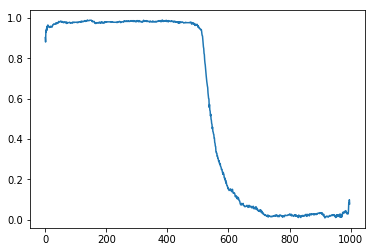

In [16]:
list=[];
model = KNeighborsClassifier()
for i in range(998):
    model.set_params(n_neighbors=1+i)
    model.fit(X_train,Y_train)
    list.append(model.score(X_test,Y_test));
plt.plot(list);

Cualitativamente, se observa que hay una buena separación entre los valores de $k$, $50$ y $400$.  

Además, a diferencia de métodos anteriores, en este método las frontes de clasificación no se observan como lineas, en consecuencia, el método es más flexible.    

Se utiliza el método del k-vecino más cercano con pesos iguales, entonces, en el caso $k$=$1000$, el clasificador arroja error puesto que hay $500$ elementos verdes, $500$ azules, y no puede decidir una clase para un punto nuevo.  

Si se obtiene un $\textit{accuracy}$ muy cercano a $0$, no es tan malo, puesto que se podria clasificar de forma inversa obteniéndose un $\textit{accuracy}$ muy cercano a $1$.  

Variando el valor de $k$, obetenemos que para:  
$k$ = $1$, $\textit{accuracy}$ $0,902$. Esto se debe a que los valores de los distintos conjuntos están muy juntos, así, los únicos con riesgo de ser mal clasificados, son puntos de cercanos a los ejes coordenados.  
$k$ entre $2$ y $500$, el se mantiene sobre $0,9$,llegando a estar sobre $0,98$ para valoresentre $200$ y $350$  

Para verificar lo anterior, se imprimió un gráfico de el $\textit{accuracy}$ en función de $k$.

#### i) Vuelva a generar datos, pero ahora de manera desbalanceada por clase, con más ejemplos en una clase que en otra, pero manteniendo el conjunto de pruebas para verificación. Visualicelo apropiadamente.

In [17]:
X_train,Y_train,X_test,Y_test = do_gaussianXOR(n1=250,n2=5)

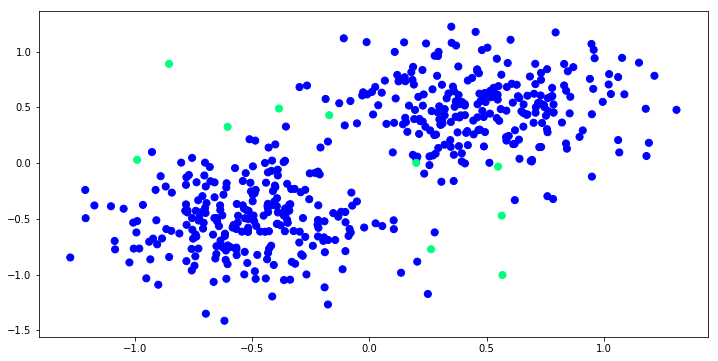

In [18]:
visualize_data(X_train,Y_train,title='Conjunto de entrenamiento')

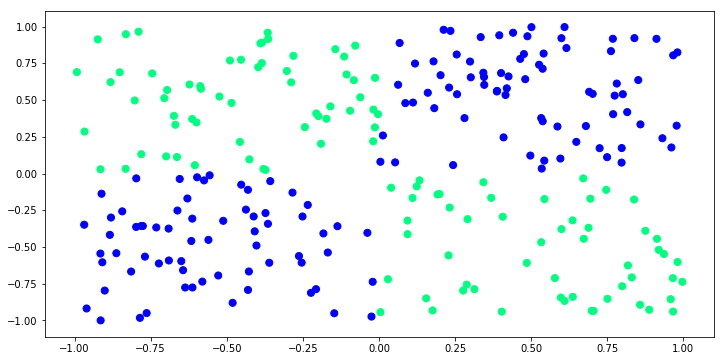

In [19]:
visualize_data(X_test,Y_test,title='Conjunto de pruebas')

In [20]:
print(X_train.shape, Y_train.shape);

(510, 2) (510,)


De las visualizaciones anteriores, notamos que el conjunto de entrenamiento está desbalanceado pues hay 10 ejemplos verdas y 500 azules.  
El conjunto de pruebas consta ahora de 510 ejemplos.  

#### j) Escoja las Máquinas de Soporte Vectorial con kernel RBF ($C=1$) o un Árbol de Decisión ($depth=5$) para entrenar sobre estos datos desbalanceados, mida el *Accuracy* sobre el conjunto de pruebas.

In [21]:
def train_model(param):
    model= SVM()
    C = 1
    print("Param C= ",C)
    model.set_params(C=C,kernel='rbf')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

p_min =1 #define your range
p_max = 1 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

interactive(children=(IntSlider(value=1, description='param', max=1, min=1), Output()), _dom_classes=('widget-…

In [22]:
def train_model(param):
    model= Tree()

    print("Depth= ",param)
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

interactive(visualize_border_interactive,param=5)

interactive(children=(IntSlider(value=5, description='param', max=15, min=-5), Output()), _dom_classes=('widge…


Como el conjunto de entrenamiento tiene muchos más datos azules que verdes, el clasificador tenderá a clasificar cualquier ejemplo nuevo como uno del conjunto azul. Sin embargo, en el conjunto de prueba, los datos están equitativamente distribuidos entre azules y verdes, por lo que se obtiene un accuracy bajo. 

Lo anterior es válido tanto para la SVM como para el árbol de decisión. Se puede verificar que los accuracy en el conjunto de pruebas son similares y cercanos a $0,55$ 

#### k) Ahora verifique que se puede mejorar la métrica a través de poner un peso en la función objetivo para las distintas clases, *seteelo* a mano o utilize la función *balanced* para que reduzca el impacto de lo datos de la clase mayoritaria en la función objetivo o que aumente el impacto de los datos de la clase minoritaria.

In [23]:
classes_weights = {0: 0.1, 1: 10}


def train_model(param):
    model= SVM()
    model.set_params(C=1,kernel='rbf',class_weight=classes_weights)
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model
interactive(visualize_border_interactive,param=1)

interactive(children=(IntSlider(value=1, description='param', max=3, min=-1), Output()), _dom_classes=('widget…

In [24]:
classes_weights = {0: 0.1, 1: 10} 

def train_model(param):
    model= Tree()
    print("Depth= ",param)
    model.set_params(max_depth=5,criterion='gini',splitter='best',class_weight=classes_weights)
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

interactive(visualize_border_interactive,param=5)

interactive(children=(IntSlider(value=5, description='param', max=15, min=-5), Output()), _dom_classes=('widge…

En el gráfico se ve que mejoro el accuracy pues la clase de los puntos verdes (clase 1) tienen más peso.  

El accuracy de la SVM aumentó a $0,827$ y el del árbol de decisión aumentó a $0,74$; en ambos casos un aumento muy significativo.  

De ahí se concluye que hay un impacto grande en el modelo al asignarle pesos distintos a las clases cuando los ejemplos del conjunto de entrenamiento no están balanceados (No hay una cantidad parecida de ejemplos por clase).  

<a id="refs"></a>
## Referencias
[1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/  
[2] http://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html  
[3] https://en.wikipedia.org/wiki/Kernel_method  
[4] http://scikit-learn.org/stable/modules/multiclass.html  
[5] Tsoumakas, G., & Katakis, I. (2007). *Multi-label classification: An overview*. International Journal of Data Warehousing and Mining (IJDWM), 3(3), 1-13.  
[6] https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-6-feature-engineering-and-feature-selection-8b94f870706a  
[7] Bishop, C. M. (2006). *Pattern recognition and machine learning (information science and statistics)* springer-verlag new york. Inc. Secaucus, NJ, USA.